# Analysis of Vodafone users' fluxes

The study of the flux of people inside urban areas is of paramount importance to achieve an optimal understanding of emerging critical issues in the local mobility, and to explore areas of potential improvements in the infrastructures and local transports.

The mobility of users within and toward Padova has been monitored using the data provided by the Vodafone mobile carrier, which provides the information based on the users' connections to the network cells.
The data provided by the carrier encompasses the monitoring of the users connected to the Vodafone network in Padova in a four-month period from February to May of 2018.

To provide statistical insights on the number and the flow of users, the data is aggregated based on the origin and movements of the users by averaging the number of connections during the time of the monitoring.

To further avoid privacy violation issues, all observations with less than 30 units (e.g. day-areas for which $<$30 users have contributed) have been discarded and/or merged into dedicated categories (indicated with "altro", or "other").


## Datasets 

The data is provided in `.csv` files.

* __day_od.csv__: table of the origins and destinations of the users averaged by the day of the week. The data is provided with details of the month, type of user (resident in Padova/Italian visitor/foreign visitor), country of provenance, together with the province and comune of the user (if available).
* __distinct_users_day.csv__: table of the number of distinct users by origin. The data is provided with details of the month, type of user (resident in Padova/Italian visitor/foreign visitor), country of provenance, together with the province and comune of the user (if available).

The information is stored in the fields according to the following scheme: 

- __MONTH__: month analyzed
- __DOW__: day analyzed
- __ORIGIN__: users' origin area (do not consider this field)
- __DESTINATION__: users' destination area (do not consider this field)
- __CUST_CLASS__: user type (resident / Italian visitor / foreigner visitor)
- __COD_COUNTRY__: users' country code (e.g. 222=Italy)
- __COD_PRO__: users' province code (e.g. 12=Varese) 
- __PRO_COM__: users' comune code (e.g. 12026=Busto Arsizio)
- __FLOW__: number of movements for given date-time (with a minimum of 30 users)
- __VISITORS__: overall number of users 

Together with the data files, three lookup-tables are provided to allow matching the Italian institute of STATistics (ISTAT) country, province and comune codes to the actual names.

* __codici_istat_comune.csv__: lookup file containing the mapping between _comune_ ISTAT code-names
* __codici_istat_provincia.csv__: lookup file containing the mapping between _province_ ISTAT code-names
* __codici_nazioni.csv__: lookup file containing mapping the _country_ code to its name

Additional information, useful for the study of the flow of users, as the number of inhabitants of each province and the distance between Padova and all other Italian provinces can be extracted based on the data collected by the ISTAT:

   - English: https://www.istat.it/en/analysis-and-products/databases, Italian: https://www.istat.it/it/dati-analisi-e-prodotti/banche-dati
   
   - English/Italian: https://www.istat.it/en/archive/157423, Italian: https://www.istat.it/it/archivio/157423
   
   - `.zip` package containing the distances between comuni in Veneto region: http://www.istat.it/storage/cartografia/matrici_distanze/Veneto.zip

If deemed useful, the open repository [https://github.com/openpolis/geojson-italy](https://github.com/openpolis/geojson-italy) contains a `.json` file with the geographical coordinates of the provences and comuni of Italy.


## Assignments

1. Data preparation: the csv files are originated from different sources, hence resulting in differences in the encoding and end-of-lines that have to be taken into account in the data preparation phase. Make sure each .csv file is properly interpreted.

   1.1 Ranking of visitors from foreign countries: based on the number of total visitors per each country, create a ranked plot of the first 20 countries with the most visitors
   
   1.2 Ranking of Italian visitors by province, weighted by the number of inhabitants: based on the number of total visitors per Italian province, create a ranked plot of the first 20 provinces with the most visitors taking into account the number of inhabitants.


2. Study of the visitors' fluxes: you are asked to provide indications on how to invest resources to improve the mobility towards Padova. Consider the three main directions of visitors and commuters getting to Padova through the main highways (from south, A13 towards Bologna-Roma; from west, A4 towards Milano-Torino; from north-east, A4 towards Venice-Trieste). Evaluate which of the three directions has to be prioritized.

   2.1 Consider a simplified case involving only the mid-range mobility, based on the number of visitors/commuters from the nearby regions only
   
   2.2 Consider the provinces located on the three directions that are mostly contributing to the flow of weekend visitors and working daily commuters by performing a more detailed study of the fluxes based on the day of the week. Use the data available to provide what you believe is the best possible answer.


3. Plot the distribution of the number of visitors by the distance of the province of origin. Determine which kind of function should be used to describe the distribution.

   3.1 Assuming an analytic form can be used to describe the trend, create a regression or a fit to estimate the expected number of visitors by the distance of the province of origin and the corresponding uncertainties. Illustrate the difference between the resulting regression with respect to the numbers provided by the Vodafone monitoring, and highlight the five most striking discrepancies from the expectations.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
# 1.1
df_nations = pd.read_csv('codici_nazioni.csv',sep=',',encoding="utf-16") # mbcs indicates the csv file was UCS-2 BE BOM encoded, not UTF-8.
df2 = pd.read_csv('distinct_users_day.csv',sep=',',encoding='mbcs') # mbcs indicates the csv file was ANSI encoded, not UTF-8.
df3 = df2.merge(df_nations) # cod_countries are matched with nations lookup table

In [4]:
df3 = df3[df3['CUST_CLASS'].str.match('foreigner')]
df3

,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS,COUNTRY_NAME_IT
12319,Giovedì,foreigner,226.0,NaN,NaN,8944,Romania
12320,Venerdì,foreigner,226.0,NaN,NaN,9840,Romania
12321,Lunedì,foreigner,226.0,NaN,NaN,8388,Romania
12322,Domenica,foreigner,226.0,NaN,NaN,7028,Romania
12323,Sabato,foreigner,226.0,NaN,NaN,7992,Romania
...,...,...,...,...,...,...,...
12830,Venerdì,foreigner,220.0,NaN,NaN,1360,Serbia
12831,Sabato,foreigner,220.0,NaN,NaN,1980,Serbia
12832,Domenica,foreigner,413.0,NaN,NaN,72,Sri Lanka
12833,Lunedì,foreigner,413.0,NaN,NaN,60,Sri Lanka


In [5]:
df_rank = df3.groupby(['COD_COUNTRY','COUNTRY_NAME_IT']).sum().reset_index()
df_rank

,COD_COUNTRY,COUNTRY_NAME_IT,COD_PRO,PRO_COM,VISITORS
0,202.0,Grecia,0.0,0.0,7960
1,204.0,Paesi Bassi,0.0,0.0,70432
2,206.0,Belgio,0.0,0.0,25380
3,208.0,Francia,0.0,0.0,129672
4,214.0,Spagna,0.0,0.0,71872
...,...,...,...,...,...
73,722.0,Argentina,0.0,0.0,5796
74,724.0,Brasile,0.0,0.0,8544
75,730.0,Cile,0.0,0.0,1640
76,732.0,Colombia,0.0,0.0,496


    COD_COUNTRY        COUNTRY_NAME_IT  COD_PRO  PRO_COM  VISITORS
3         208.0                Francia      0.0      0.0    129672
9         228.0               Svizzera      0.0      0.0    116884
25        262.0               Germania      0.0      0.0    109176
58        460.0                   Cina      0.0      0.0    107796
12        232.0                Austria      0.0      0.0     96776
4         214.0                 Spagna      0.0      0.0     71872
1         204.0            Paesi Bassi      0.0      0.0     70432
41        310.0  Stati Uniti d'America      0.0      0.0     64160
8         226.0                Romania      0.0      0.0     59012
13        234.0          Gran Bretagna      0.0      0.0     46180
21        250.0                 Russia      0.0      0.0     42424
5         216.0               Ungheria      0.0      0.0     30344
6         219.0                Croazia      0.0      0.0     26504
36        293.0               Slovenia      0.0      0.0     2

Text(0.5, 0, 'Countries')

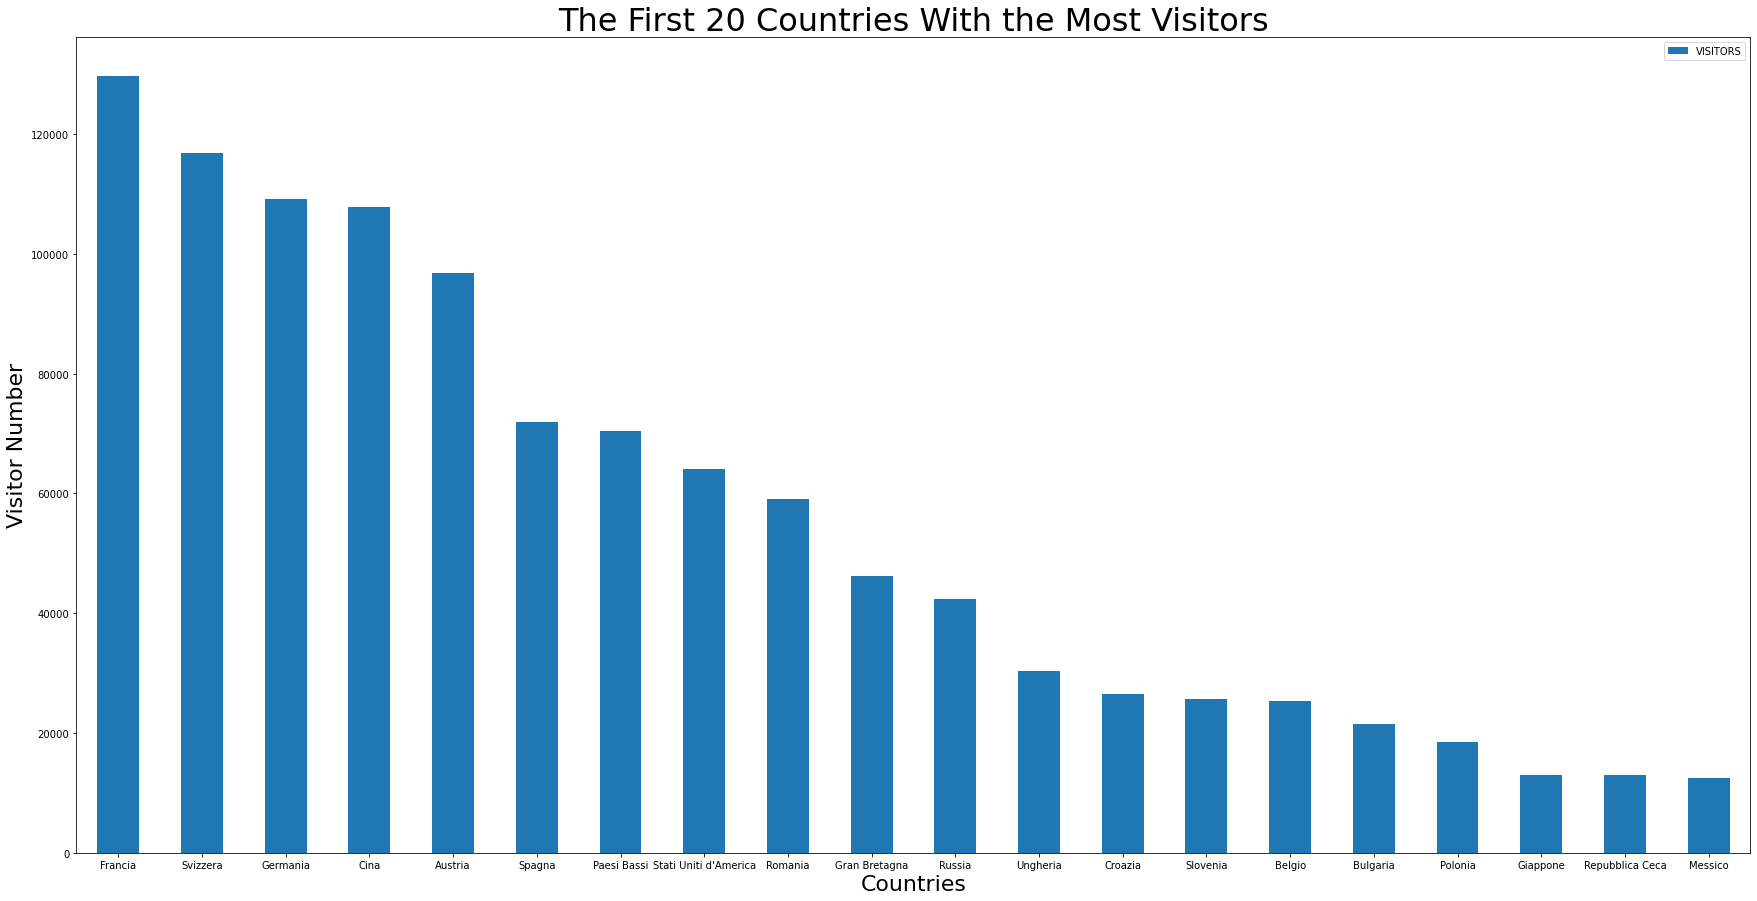

In [6]:
#df_rank.to_csv('first_assignment.csv', sep='\t', encoding='utf-8') # saves the df into a UTF-8 coded csv file
df_first20 = df_rank.sort_values('VISITORS',ascending = False).head(20) # sort the df and gets the first 20 rows
print(df_first20)
#PLOTTING PART
ax = df_first20.plot.bar(x='COUNTRY_NAME_IT', y='VISITORS', rot=0,figsize=(30, 15))
ax.set_title('The First 20 Countries With the Most Visitors', fontdict={'size':32})
ax.set_ylabel(ylabel='Visitor Number', fontdict={'size':22})
ax.set_xlabel(xlabel='Countries', fontdict={'size':22})

In [7]:
#1.2  wieghted by the inhabitants derken???
df_province = pd.read_csv('codici_istat_provincia.csv',sep=',',encoding="mbcs") # mbcs indicates the csv file was ANSI encoded, not UTF-8.
df2 = pd.read_csv('distinct_users_day.csv',sep=',',encoding='mbcs') 
df3 = df2.merge(df_province) # cod_pro are matched with nations lookup table
df3

,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS,COD_REG,PROVINCIA,PROV_SIGLA
0,Mercoledì,visitor,222.0,35.0,35033.0,968,8,Reggio nell'Emilia,RE
1,Sabato,visitor,222.0,35.0,35040.0,112,8,Reggio nell'Emilia,RE
2,Lunedì,visitor,222.0,35.0,35027.0,76,8,Reggio nell'Emilia,RE
3,Mercoledì,visitor,222.0,35.0,35004.0,36,8,Reggio nell'Emilia,RE
4,Lunedì,visitor,222.0,35.0,35036.0,156,8,Reggio nell'Emilia,RE
...,...,...,...,...,...,...,...,...,...
12264,Mercoledì,visitor,222.0,57.0,57059.0,64,12,Rieti,RI
12265,Sabato,visitor,222.0,57.0,57059.0,68,12,Rieti,RI
12266,Giovedì,visitor,222.0,57.0,57059.0,68,12,Rieti,RI
12267,Martedì,visitor,222.0,57.0,57059.0,68,12,Rieti,RI


In [8]:
df_province

,COD_REG,COD_PRO,PROVINCIA,PROV_SIGLA
0,1,1,Torino,TO
1,1,2,Vercelli,VC
2,1,3,Novara,NO
3,1,4,Cuneo,CN
4,1,5,Asti,AT
...,...,...,...,...
103,20,91,Nuoro,NU
104,20,92,Cagliari,CA
105,20,95,Oristano,OR
106,20,111,Sud Sardegna,SU


In [9]:
df_inhabitant = pd.read_csv('population_2019.csv',sep=',',encoding="mbcs")
df_inhabitant = df_inhabitant[['Territory', 'Value']]
df_inhabitant = df_inhabitant.rename(columns={"Value": "Inhabitants"})
df_inhabitant

,Territory,Inhabitants
0,Italy,59816673
1,Nord-ovest,15998031
2,Piemonte,4328565
3,Torino,2238663
4,Vercelli,170493
...,...,...
130,Agrigento,428003
131,Siracusa,391400
132,Oristano,156623
133,Monza e della Brianza,867385


In [10]:
#df4 = df3.merge(df_inhabitant) # cod_pro are matched with nations lookup table
df4 = pd.merge(left=df3, right=df_inhabitant, left_on='PROVINCIA', right_on='Territory')
df4

,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS,COD_REG,PROVINCIA,PROV_SIGLA,Territory,Inhabitants
0,Mercoledì,visitor,222.0,35.0,35033.0,968,8,Reggio nell'Emilia,RE,Reggio nell'Emilia,529932
1,Sabato,visitor,222.0,35.0,35040.0,112,8,Reggio nell'Emilia,RE,Reggio nell'Emilia,529932
2,Lunedì,visitor,222.0,35.0,35027.0,76,8,Reggio nell'Emilia,RE,Reggio nell'Emilia,529932
3,Mercoledì,visitor,222.0,35.0,35004.0,36,8,Reggio nell'Emilia,RE,Reggio nell'Emilia,529932
4,Lunedì,visitor,222.0,35.0,35036.0,156,8,Reggio nell'Emilia,RE,Reggio nell'Emilia,529932
...,...,...,...,...,...,...,...,...,...,...,...
11935,Mercoledì,visitor,222.0,57.0,57059.0,64,12,Rieti,RI,Rieti,153534
11936,Sabato,visitor,222.0,57.0,57059.0,68,12,Rieti,RI,Rieti,153534
11937,Giovedì,visitor,222.0,57.0,57059.0,68,12,Rieti,RI,Rieti,153534
11938,Martedì,visitor,222.0,57.0,57059.0,68,12,Rieti,RI,Rieti,153534


In [11]:
df4 = df4[df4['CUST_CLASS'].str.match('visitor')]
df4

,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS,COD_REG,PROVINCIA,PROV_SIGLA,Territory,Inhabitants
0,Mercoledì,visitor,222.0,35.0,35033.0,968,8,Reggio nell'Emilia,RE,Reggio nell'Emilia,529932
1,Sabato,visitor,222.0,35.0,35040.0,112,8,Reggio nell'Emilia,RE,Reggio nell'Emilia,529932
2,Lunedì,visitor,222.0,35.0,35027.0,76,8,Reggio nell'Emilia,RE,Reggio nell'Emilia,529932
3,Mercoledì,visitor,222.0,35.0,35004.0,36,8,Reggio nell'Emilia,RE,Reggio nell'Emilia,529932
4,Lunedì,visitor,222.0,35.0,35036.0,156,8,Reggio nell'Emilia,RE,Reggio nell'Emilia,529932
...,...,...,...,...,...,...,...,...,...,...,...
11935,Mercoledì,visitor,222.0,57.0,57059.0,64,12,Rieti,RI,Rieti,153534
11936,Sabato,visitor,222.0,57.0,57059.0,68,12,Rieti,RI,Rieti,153534
11937,Giovedì,visitor,222.0,57.0,57059.0,68,12,Rieti,RI,Rieti,153534
11938,Martedì,visitor,222.0,57.0,57059.0,68,12,Rieti,RI,Rieti,153534


In [12]:
df_rank = df4.groupby(['COD_PRO','PROVINCIA','Inhabitants']).sum().reset_index()
df_rank['Weighted Value'] = df_rank.apply(lambda row: (row['VISITORS']*row['Inhabitants']), axis=1)
#df_rank['Weighted Value'] = df_rank[df_rank['VISITORS']* df_rank['Inhabitants']]
df_rank = df_rank.drop('PRO_COM', 1)
df_rank = df_rank.drop('COD_REG', 1)
df_rank = df_rank.drop('COD_COUNTRY', 1)
df_rank

,COD_PRO,PROVINCIA,Inhabitants,VISITORS,Weighted Value
0,1.0,Torino,2238663,39068,87460086084
1,2.0,Vercelli,170493,1940,330756420
2,3.0,Novara,365773,9164,3351943772
3,4.0,Cuneo,587213,3372,1980082236
4,5.0,Asti,213504,1440,307445760
...,...,...,...,...,...
97,102.0,Vibo Valentia,156378,428,66929784
98,103.0,Verbano-Cusio-Ossola,157278,2000,314556000
99,108.0,Monza e della Brianza,867385,30648,26583615480
100,109.0,Fermo,172681,2676,462094356


Text(0.5, 0, 'Provincies')

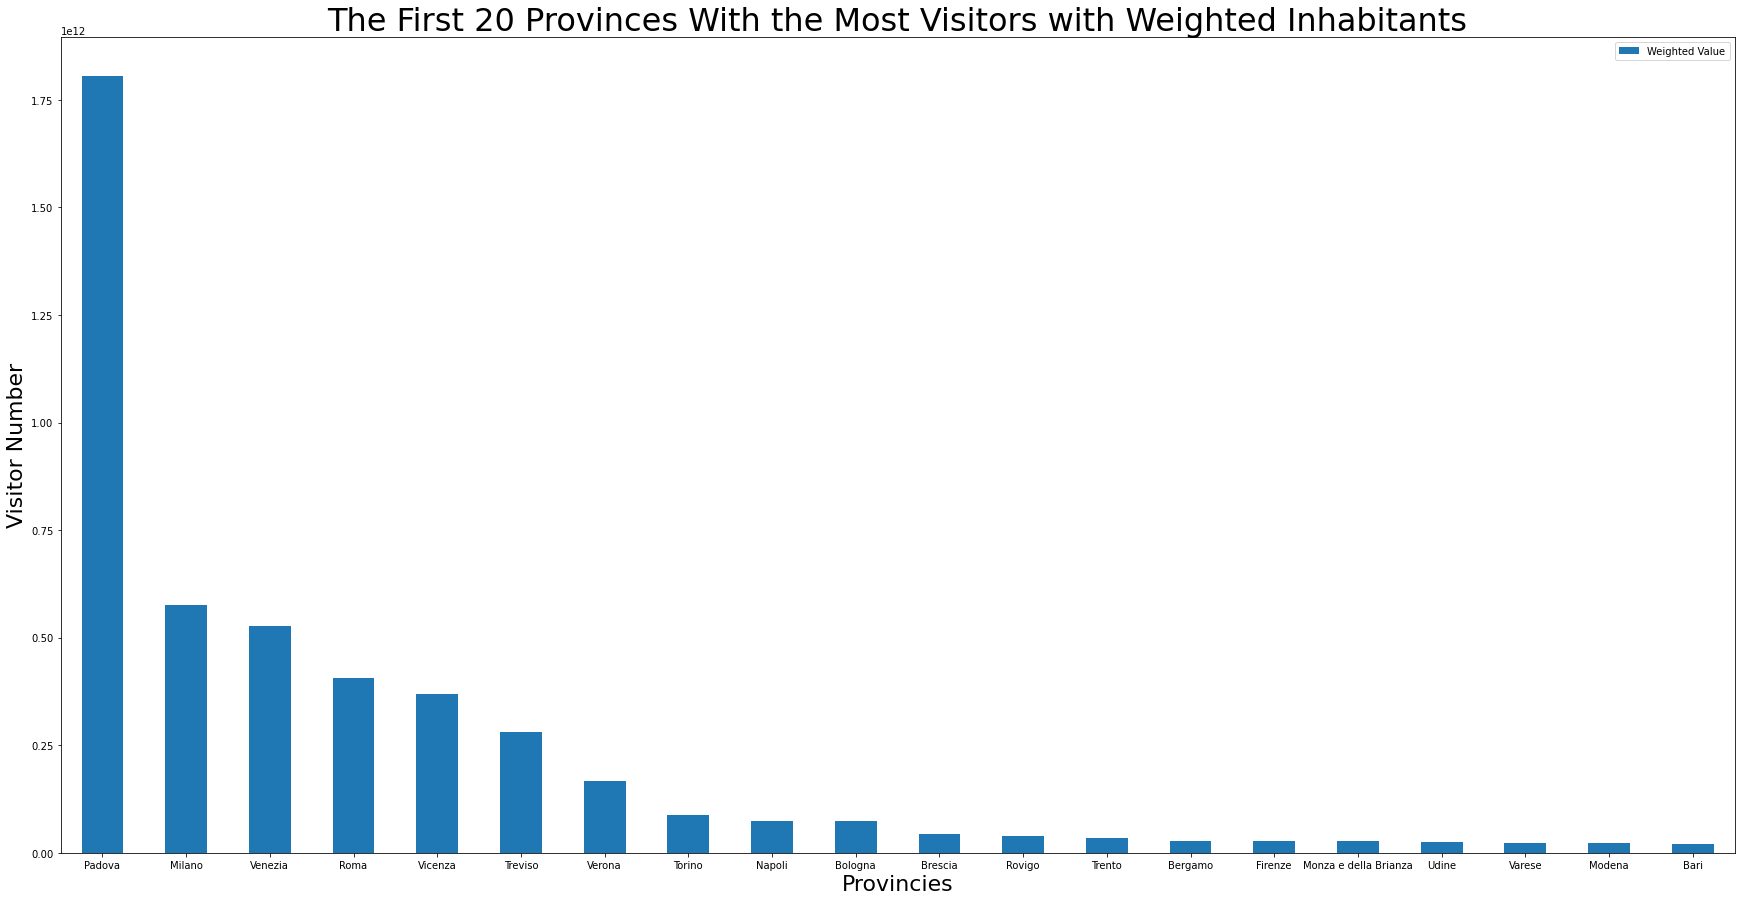

In [13]:
#df_rank.to_csv('first_assignment.csv', sep='\t', encoding='utf-8') # saves the df into a UTF-8 coded csv file
df_first20 = df_rank.sort_values('Weighted Value',ascending = False).head(20) # sort the df and gets the first 20 rows

#PLOTTING PART
ax = df_first20.plot.bar(x='PROVINCIA', y='Weighted Value', rot=0,figsize=(30, 15))
ax.set_title('The First 20 Provinces With the Most Visitors with Weighted Inhabitants', fontdict={'size':32})
ax.set_ylabel(ylabel='Visitor Number', fontdict={'size':22})
ax.set_xlabel(xlabel='Provincies', fontdict={'size':22})

In [14]:
region_code = pd.read_csv("Codici-statistici-e-denominazioni-al-01_01_2022.csv", sep=";", usecols=range(0,12))
df_re =pd.DataFrame(region_code)
#region inhabitant
pd_reg = pd.merge(df4, df_re[["COD_REG","Denominazione Regione"]], on="COD_REG", how="left")
pd_reg

,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS,COD_REG,PROVINCIA,PROV_SIGLA,Territory,Inhabitants,Denominazione Regione
0,Mercoledì,visitor,222.0,35.0,35033.0,968,8,Reggio nell'Emilia,RE,Reggio nell'Emilia,529932,Emilia-Romagna
1,Mercoledì,visitor,222.0,35.0,35033.0,968,8,Reggio nell'Emilia,RE,Reggio nell'Emilia,529932,Emilia-Romagna
2,Mercoledì,visitor,222.0,35.0,35033.0,968,8,Reggio nell'Emilia,RE,Reggio nell'Emilia,529932,Emilia-Romagna
3,Mercoledì,visitor,222.0,35.0,35033.0,968,8,Reggio nell'Emilia,RE,Reggio nell'Emilia,529932,Emilia-Romagna
4,Mercoledì,visitor,222.0,35.0,35033.0,968,8,Reggio nell'Emilia,RE,Reggio nell'Emilia,529932,Emilia-Romagna
...,...,...,...,...,...,...,...,...,...,...,...,...
8120059,Lunedì,visitor,222.0,57.0,57059.0,88,12,Rieti,RI,Rieti,153534,Lazio
8120060,Lunedì,visitor,222.0,57.0,57059.0,88,12,Rieti,RI,Rieti,153534,Lazio
8120061,Lunedì,visitor,222.0,57.0,57059.0,88,12,Rieti,RI,Rieti,153534,Lazio
8120062,Lunedì,visitor,222.0,57.0,57059.0,88,12,Rieti,RI,Rieti,153534,Lazio


In [15]:
#filter 
reg_sum = pd_reg.groupby(["COD_REG","Denominazione Regione"]).sum("VISITORS").reset_index().drop(["COD_COUNTRY","COD_PRO","PRO_COM","Inhabitants"], axis=1)
reg_sum = reg_sum.sort_values("VISITORS", ascending = False)
reg_sum = reg_sum.rename(columns={'Denominazione Regione': 'reg_name'}, index={'TWO': 'Row_1'}) #change the title of Denominazione Regione to reg_name so its easier to join with other dataframes
reg_sum['reg_name'] = reg_sum['reg_name'].replace(['Trentino-Alto Adige/S�dtirol'],'Trentino-Alto Adige/Südtirol')#replace the name of region so its relevan to other datas
reg_sum

,COD_REG,reg_name,VISITORS
3,5,Veneto,2079816584
1,3,Lombardia,542882880
0,1,Piemonte,76651624
6,8,Emilia-Romagna,73146480
10,12,Lazio,39894120
4,6,Friuli-Venezia Giulia,23986260
13,15,Campania,20691000
7,9,Toscana,20348328
2,4,Trentino-Alto Adige/Südtirol,18371736
14,16,Puglia,10895772


In [16]:
print(reg_sum)

    COD_REG                      reg_name    VISITORS
3         5                        Veneto  2079816584
1         3                     Lombardia   542882880
0         1                      Piemonte    76651624
6         8                Emilia-Romagna    73146480
10       12                         Lazio    39894120
4         6         Friuli-Venezia Giulia    23986260
13       15                      Campania    20691000
7         9                       Toscana    20348328
2         4  Trentino-Alto Adige/Südtirol    18371736
14       16                        Puglia    10895772
17       19                       Sicilia     9923580
9        11                        Marche     7110000
5         7                       Liguria     6767280
11       13                       Abruzzo     4989800
16       18                      Calabria     3753968
18       20                      Sardegna     3115528
8        10                        Umbria     1195632
15       17                 

In [28]:
from IPython.display import GeoJSON
from shapely.geometry import Point, Polygon
import geojsonio
from geojsonio import display
import geopandas as gpd
!pip install geopy

In [29]:
province_map = gpd.read_file("limits_IT_provinces.geojson") #read geojson file from github
province_map =province_map[["prov_name","geometry"]] #we only use prov name and geometry
province_map ["centroid"] = province_map.geometry.centroid #find the centroid of all provinces
province_map

,prov_name,geometry,centroid
0,Torino,"POLYGON ((7.89397 45.58222, 7.89654 45.57985, ...",POINT (7.43901 45.14476)
1,Vercelli,"POLYGON ((7.92900 45.74244, 7.92584 45.74196, ...",POINT (8.20922 45.52532)
2,Novara,"POLYGON ((8.42079 45.82981, 8.42028 45.83010, ...",POINT (8.55392 45.56344)
3,Cuneo,"MULTIPOLYGON (((6.94540 44.42794, 6.94734 44.4...",POINT (7.58811 44.47697)
4,Asti,"POLYGON ((7.96685 45.11667, 7.96729 45.11673, ...",POINT (8.18596 44.87763)
...,...,...,...
102,Sassari,"MULTIPOLYGON (((9.46502 40.65584, 9.46475 40.6...",POINT (8.96431 40.74701)
103,Nuoro,"MULTIPOLYGON (((9.28037 39.91741, 9.27741 39.9...",POINT (9.36904 40.18199)
104,Cagliari,"MULTIPOLYGON (((9.00622 39.32697, 9.01541 39.3...",POINT (9.10737 39.20738)
105,Oristano,"MULTIPOLYGON (((8.78200 40.18982, 8.78829 40.1...",POINT (8.71691 39.98962)


In [30]:
padova_point = province_map.loc[province_map['prov_name'] == 'Padova'] #select padova geolocation
padova_point

,prov_name,geometry,centroid
28,Padova,"POLYGON ((11.98296 45.16275, 11.98343 45.15557...",POINT (11.80793 45.34929)


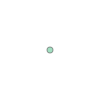

In [31]:
point = padova_point.iat[0,2] #point of padova
point

In [32]:
region_map = gpd.read_file("limits_IT_regions.geojson") #read geojson file from github
region_map

,reg_name,reg_istat_code_num,reg_istat_code,geometry
0,Piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ..."
1,Valle d'Aosta/Vallée d'Aoste,2,02,"POLYGON ((7.73455 45.92365, 7.73590 45.92744, ..."
2,Lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7..."
3,Trentino-Alto Adige/Südtirol,4,04,"POLYGON ((12.01396 46.55091, 12.01376 46.55077..."
4,Veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63228 45.56846..."
5,Friuli-Venezia Giulia,6,06,"MULTIPOLYGON (((13.51691 46.38301, 13.51750 46..."
6,Liguria,7,07,"MULTIPOLYGON (((7.55166 43.89429, 7.56264 43.9..."
7,Emilia-Romagna,8,08,"MULTIPOLYGON (((9.33258 44.73504, 9.33167 44.7..."
8,Toscana,9,09,"MULTIPOLYGON (((9.89786 44.16359, 9.89451 44.1..."
9,Umbria,10,10,"MULTIPOLYGON (((13.15849 42.65425, 13.15764 42..."


In [33]:
region_map = region_map[["reg_name", "geometry"]] #we will only use region name and geometry columns
region_map ["centroid"] = region_map.geometry.centroid #find the centroid of each location
region_map

<ipython-input-33-c12c5c04ed39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_map ["centroid"] = region_map.geometry.centroid #find the centroid of each location


,reg_name,geometry,centroid
0,Piemonte,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",POINT (7.92315 45.06056)
1,Valle d'Aosta/Vallée d'Aoste,"POLYGON ((7.73455 45.92365, 7.73590 45.92744, ...",POINT (7.38721 45.73020)
2,Lombardia,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",POINT (9.76906 45.62070)
3,Trentino-Alto Adige/Südtirol,"POLYGON ((12.01396 46.55091, 12.01376 46.55077...",POINT (11.28201 46.44148)
4,Veneto,"POLYGON ((10.63538 45.53543, 10.63228 45.56846...",POINT (11.85548 45.64820)
5,Friuli-Venezia Giulia,"MULTIPOLYGON (((13.51691 46.38301, 13.51750 46...",POINT (13.05281 46.15439)
6,Liguria,"MULTIPOLYGON (((7.55166 43.89429, 7.56264 43.9...",POINT (8.70462 44.26477)
7,Emilia-Romagna,"MULTIPOLYGON (((9.33258 44.73504, 9.33167 44.7...",POINT (11.04109 44.52389)
8,Toscana,"MULTIPOLYGON (((9.89786 44.16359, 9.89451 44.1...",POINT (11.12633 43.45091)
9,Umbria,"MULTIPOLYGON (((13.15849 42.65425, 13.15764 42...",POINT (12.49001 42.96600)


<AxesSubplot:>

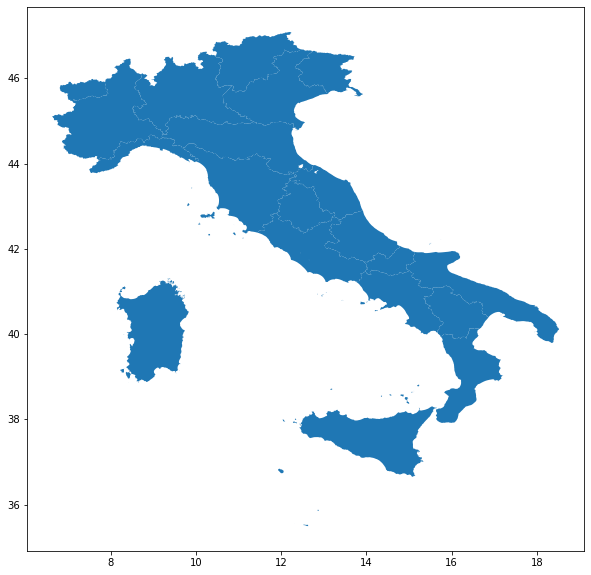

In [34]:
region_map.plot(figsize = (20,10))

In [35]:
region_map =region_map.drop(4) #drop veneto as we want nearby regions
region_map = region_map.assign(dist_to_padova=region_map.distance(point)) #assign distance towards padova
region_map

,reg_name,geometry,centroid,dist_to_padova
0,Piemonte,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",POINT (7.92315 45.06056),2.662168
1,Valle d'Aosta/Vallée d'Aoste,"POLYGON ((7.73455 45.92365, 7.73590 45.92744, ...",POINT (7.38721 45.73020),3.879612
2,Lombardia,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",POINT (9.76906 45.62070),0.545120
3,Trentino-Alto Adige/Südtirol,"POLYGON ((12.01396 46.55091, 12.01376 46.55077...",POINT (11.28201 46.44148),0.629639
5,Friuli-Venezia Giulia,"MULTIPOLYGON (((13.51691 46.38301, 13.51750 46...",POINT (13.05281 46.15439),0.859916
6,Liguria,"MULTIPOLYGON (((7.55166 43.89429, 7.56264 43.9...",POINT (8.70462 44.26477),2.142122
7,Emilia-Romagna,"MULTIPOLYGON (((9.33258 44.73504, 9.33167 44.7...",POINT (11.04109 44.52389),0.371998
8,Toscana,"MULTIPOLYGON (((9.89786 44.16359, 9.89451 44.1...",POINT (11.12633 43.45091),1.175527
9,Umbria,"MULTIPOLYGON (((13.15849 42.65425, 13.15764 42...",POINT (12.49001 42.96600),1.785164
10,Marche,"POLYGON ((12.40021 43.50977, 12.39933 43.50953...",POINT (13.14318 43.34360),1.589157


In [36]:
#sort by minimum value of distance
region_map =region_map.sort_values(by = 'dist_to_padova', ascending = True)
region_map

,reg_name,geometry,centroid,dist_to_padova
7,Emilia-Romagna,"MULTIPOLYGON (((9.33258 44.73504, 9.33167 44.7...",POINT (11.04109 44.52389),0.371998
2,Lombardia,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",POINT (9.76906 45.62070),0.545120
3,Trentino-Alto Adige/Südtirol,"POLYGON ((12.01396 46.55091, 12.01376 46.55077...",POINT (11.28201 46.44148),0.629639
5,Friuli-Venezia Giulia,"MULTIPOLYGON (((13.51691 46.38301, 13.51750 46...",POINT (13.05281 46.15439),0.859916
8,Toscana,"MULTIPOLYGON (((9.89786 44.16359, 9.89451 44.1...",POINT (11.12633 43.45091),1.175527
10,Marche,"POLYGON ((12.40021 43.50977, 12.39933 43.50953...",POINT (13.14318 43.34360),1.589157
9,Umbria,"MULTIPOLYGON (((13.15849 42.65425, 13.15764 42...",POINT (12.49001 42.96600),1.785164
6,Liguria,"MULTIPOLYGON (((7.55166 43.89429, 7.56264 43.9...",POINT (8.70462 44.26477),2.142122
11,Lazio,"MULTIPOLYGON (((11.81091 42.80692, 11.81269 42...",POINT (12.76691 41.98011),2.510968
0,Piemonte,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",POINT (7.92315 45.06056),2.662168


In [37]:
closest_regs = region_map[0:4]
closest_regs

,reg_name,geometry,centroid,dist_to_padova
7,Emilia-Romagna,"MULTIPOLYGON (((9.33258 44.73504, 9.33167 44.7...",POINT (11.04109 44.52389),0.371998
2,Lombardia,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",POINT (9.76906 45.62070),0.545120
3,Trentino-Alto Adige/Südtirol,"POLYGON ((12.01396 46.55091, 12.01376 46.55077...",POINT (11.28201 46.44148),0.629639
5,Friuli-Venezia Giulia,"MULTIPOLYGON (((13.51691 46.38301, 13.51750 46...",POINT (13.05281 46.15439),0.859916


In [38]:
closest_visitors = pd.merge(closest_regs,reg_sum[["reg_name", "VISITORS"]], on="reg_name", how="left") #merge the number of visitors 
closest_visitors = closest_visitors.sort_values(by = 'VISITORS', ascending = False)
closest_visitors

,reg_name,geometry,centroid,dist_to_padova,VISITORS
1,Lombardia,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",POINT (9.76906 45.62070),0.545120,542882880
0,Emilia-Romagna,"MULTIPOLYGON (((9.33258 44.73504, 9.33167 44.7...",POINT (11.04109 44.52389),0.371998,73146480
3,Friuli-Venezia Giulia,"MULTIPOLYGON (((13.51691 46.38301, 13.51750 46...",POINT (13.05281 46.15439),0.859916,23986260
2,Trentino-Alto Adige/Südtirol,"POLYGON ((12.01396 46.55091, 12.01376 46.55077...",POINT (11.28201 46.44148),0.629639,18371736


In [ ]:
#Finding Highways coordinate in italy to use for visitors flux
